In [81]:
# libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Loading data
dfProcessed = pd.read_csv('IMDBReviewsCleanned.csv')
del dfProcessed['Unnamed: 0']
print(dfProcessed.shape)
print(dfProcessed.head())

(50000, 2)
                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production  the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there is a family where a little boy...  negative
4  petter matteis love in the time of money is a ...  positive


In [7]:
# Dividing data into matrix
X = dfProcessed['review'].copy()
y = dfProcessed['sentiment'].copy()
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=1234)

In [72]:
# Printing train dataset
XTrain.head()

,review
24515,"[if, i, were, to, create, a, movie, thermomete..."
21369,"[heavily, reedited, and, often, confusing, the..."
7912,"[as, someone, who, has, both, read, the, novel..."
40811,"[the, main, reason, for, writing, this, review..."
34910,"[this, is, the, worst, movie, i, have, ever, s..."


<Axes: >

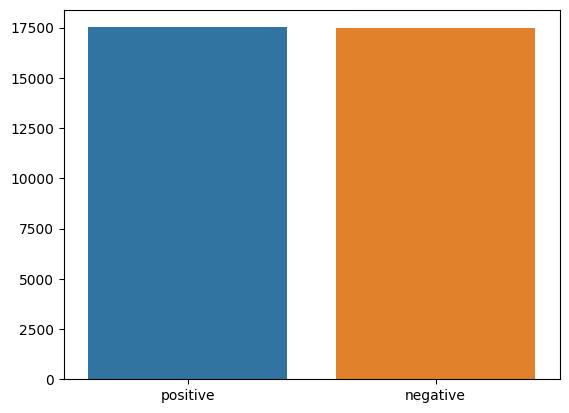

In [8]:
# Cheking distribution of Y
sns.barplot(x=['positive', 'negative'], y=yTrain.value_counts().values)

# Frequency Embeddings

In [13]:
# Creating Freq object
FreqEmb = CountVectorizer(max_features=1000)
XFreq = FreqEmb.fit_transform(X)
XFreq

<50000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4389879 stored elements in Compressed Sparse Row format>

In [18]:
# Printing dataframe
pd.DataFrame(XFreq.toarray(), columns=FreqEmb.get_feature_names_out())

,10,20,30,70s,80s,able,about,above,absolutely,across,...,yet,york,you,youll,young,your,youre,yourself,youve,zombie
0,0,0,0,0,0,0,1,0,0,0,...,0,0,2,1,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2
4,0,0,0,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,0,1,0,0,0,...,0,0,2,0,0,1,0,3,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,1,0,0,0,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [20]:
# Applying to train and test
XTrainFreq = FreqEmb.transform(XTrain)
XTestFreq = FreqEmb.transform(XTest)
XTrainFreq

<35000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3075360 stored elements in Compressed Sparse Row format>

In [21]:
# Printing dataframe trainOHE
pd.DataFrame(XTrainFreq.toarray(), columns=FreqEmb.get_feature_names_out())

,10,20,30,70s,80s,able,about,above,absolutely,across,...,yet,york,you,youll,young,your,youre,yourself,youve,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
34996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34997,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
34998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# tf-idf embeddings

In [22]:
# Creating tf object
tfidfEmb = TfidfVectorizer(max_features=1000)
XTF = tfidfEmb.fit_transform(X)
XTF

<50000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4389879 stored elements in Compressed Sparse Row format>

In [23]:
# Printing dataframe
pd.DataFrame(XTF.toarray(), columns=tfidfEmb.get_feature_names_out())

,10,20,30,70s,80s,able,about,above,absolutely,across,...,yet,york,you,youll,young,your,youre,yourself,youve,zombie
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.035092,0.0,0.0,0.000000,...,0.0,0.000000,0.061796,0.076224,0.00000,0.051629,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.053362,0.0,0.0,0.000000,...,0.0,0.000000,0.046984,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.10469,0.000000,0.000000,0.000000,0.0,0.000000
3,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.047362,0.000000,0.00000,0.000000,0.107727,0.000000,0.0,0.318851
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.075729,0.0,0.0,0.000000,...,0.0,0.095449,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.108969,0.000000,0.0,0.0,0.0,0.044945,0.0,0.0,0.000000,...,0.0,0.000000,0.079147,0.000000,0.00000,0.066126,0.000000,0.311113,0.0,0.000000
49996,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.060886,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
49997,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
49998,0.000000,0.000000,0.133286,0.0,0.0,0.0,0.102823,0.0,0.0,0.118015,...,0.0,0.000000,0.045267,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000


In [24]:
# Applying to train and test
XTrainTF = tfidfEmb.transform(XTrain)
XTestTF = tfidfEmb.transform(XTest)
XTrainTF

<35000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3075360 stored elements in Compressed Sparse Row format>

In [25]:
# Printing dataframe trainTF
pd.DataFrame(XTrainTF.toarray(), columns=tfidfEmb.get_feature_names_out())

,10,20,30,70s,80s,able,about,above,absolutely,across,...,yet,york,you,youll,young,your,youre,yourself,youve,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.083484,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.031642,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.057492,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.0,0.0,0.0,0.0,0.0,0.0,0.120312,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.104144,0.0,0.0,0.0,0.0,0.0
34996,0.0,0.0,0.0,0.0,0.0,0.0,0.047192,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
34997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.092782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
34998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.046499,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# Keras embeddings

In [50]:
# Total documents in the corpus
totalText = dfProcessed.shape[0]
print(totalText)

50000


In [38]:
# Setting train & test series into a df
XTrain = pd.DataFrame(XTrain, columns=['review'])
XTest = pd.DataFrame(XTest, columns=['review'])

In [42]:
# Tokenizing each dataset
XTrain['review'] = XTrain['review'].apply(lambda x: word_tokenize(x))
XTest['review'] = XTest['review'].apply(lambda x: word_tokenize(x))

In [48]:
# Compiling each df into a list of tokens
XTrainCorpus = []
XTestCorpus = []
for text in XTrain['review']:
    XTrainCorpus.append(text)

for text in XTest['review']:
    XTestCorpus.append(text)

In [66]:
# Asigning an unique integer to each word and document
textTokenizer = Tokenizer(totalText)
textTokenizer.fit_on_texts(XTrainCorpus)
XTrainCorpus = textTokenizer.texts_to_sequences(XTrainCorpus)
print(XTrainCorpus)

The proccedure above assign an unique index to each document and each word of the corpus. The first document starts with the words "If I were...", so if we look up into the dictionary created in the TestTokenizer,  we can see integers 44, 9 and 67 were assigned to those words.

Then, when we applied the "texts_to_sequences" method to the training data and picked the first document, we can see it starts with the integers 44, 9 and 67. After this proccedure both documents and words became a list of sequences

In [77]:
textTokenizer.index_word

135449

In [76]:
print(XTrainCorpus[0])

[44, 9, 67, 6, 996, 3, 17, 41184, 10, 17, 49, 26, 1529, 1632, 45, 4, 700, 390, 9, 49, 1072, 7, 14, 1048, 114, 1632, 390, 379, 471, 1632, 390, 435, 471, 1632, 390, 112, 1632, 390, 7, 5, 14, 149, 306, 361, 1355, 173, 278, 27, 2855, 15, 3, 365, 94, 58, 3, 114, 2, 304, 3, 17, 7, 5, 33, 1812, 8, 100, 1576, 1074, 11, 9, 49, 235, 104, 318, 1298, 175, 3, 306, 361, 72, 104, 10, 17, 182, 137, 5, 6, 26, 283, 16, 1, 5922, 1, 5629, 8, 1, 8900, 5, 27, 4, 1, 87, 13066, 150, 131, 120, 89, 4, 29, 1, 20200, 308, 3162, 2977, 1959, 28, 231, 80, 22074, 64, 2494, 141, 2, 2508, 6, 18664, 21078, 1, 1852, 152, 4575, 231, 357, 2715, 3849, 56, 29964, 56, 6297, 56, 11714, 40, 11239, 48801, 175, 44, 23, 169, 6, 63, 109, 2335, 325, 285, 281, 190, 7, 3, 3795, 5117, 101, 23, 21, 10088, 1, 11240, 1, 9191, 5086, 29, 4, 1, 48802, 1, 22075, 36263, 1, 1144, 20, 1, 4472, 2, 33, 20]


In [82]:
# Turning list of sequences into array
XTrainCorpus = pad_sequences(XTrainCorpus,
                             maxlen=128, # max len of each document
                             truncating='post', # if document is longer than 128, the character post will reeplace the extra tokens
                             padding='post', # if document is shorter than 128, the charater post will be added to complete
                            )
XTrainCorpus[0]

[   44     9    67     6   996     3    17 41184    10    17    49    26
  1529  1632    45     4   700   390     9    49  1072     7    14  1048
   114  1632   390   379   471  1632   390   435   471  1632   390   112
  1632   390     7     5    14   149   306   361  1355   173   278    27
  2855    15     3   365    94    58     3   114     2   304     3    17
     7     5    33  1812     8   100  1576  1074    11     9    49   235
   104   318  1298   175     3   306   361    72   104    10    17   182
   137     5     6    26   283    16     1  5922     1  5629     8     1
  8900     5    27     4     1    87 13066   150   131   120    89     4
    29     1 20200   308  3162  2977  1959    28   231    80 22074    64
  2494   141     2  2508     6 18664 21078     1]


In [85]:
# Printing shape of train dataset
XTrainCorpus.shape

(35000, 128)

In [86]:
# Appliying the process to test data
XTestCorpus = textTokenizer.texts_to_sequences(XTestCorpus)
XTestCorpus = pad_sequences(XTestCorpus, maxlen=128, truncating='post', padding='post')
XTestCorpus[0]

array([  242,    10,    19,    13,    94,   140, 22124, 11373,    14,
           1, 33518,  4228,     4,  1564,     2,   140,  3625, 36268,
         125,  3747,    11,    23,    77,     1,   212,    10,  6064,
         869,   677,  7474,   142,  8357, 27255, 32401,     5,    40,
        1329,    14,     1, 38778,    39,    75,  2239,     2,  3643,
           1,  1004,     5,   574,    18, 17625,    33,    85,     1,
         608,     5,    33,   295,  1810,     7,     1,   344,    59,
          90,    20,   225,    85,     9,  4776,   443,   110,    63,
           3,   122,  4448,  2649,   225,    17,  8271,   110,   418,
          33,    50,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [27]:
# Exporting dataframes
pd.DataFrame(XTrainFreq.toarray(), columns=FreqEmb.get_feature_names_out()).to_csv('XTrainFreq.csv')
pd.DataFrame(XTrainTF.toarray(), columns=tfidfEmb.get_feature_names_out()).to_csv('XTrainTF.csv')
pd.DataFrame(XTestFreq.toarray(), columns=FreqEmb.get_feature_names_out()).to_csv('XTestFreq.csv')
pd.DataFrame(XTestTF.toarray(), columns=tfidfEmb.get_feature_names_out()).to_csv('XTestTF.csv')
yTrain.to_csv('yTrain.csv')
yTest.to_csv('yTest.csv')